# Text Analytics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

2021-11-14 22:43:50.784105: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2021-11-14 22:43:50.784160: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


***
## 1. Text Pre-processing

##### Library imports

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/instructor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/instructor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sentence = "I love living in Brooklyn!!"

##### Remove punctuation

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation,"")

print(sentence)

I love living in Brooklyn


##### Stemming and lemmatizing

In [6]:
PorterStemmer().stem(word="studying")

'studi'

In [7]:
#You have to specify the POS, or part of speech, here 'v' stands for verb
WordNetLemmatizer().lemmatize('studying', 'v') 

'study'

##### Convert to lowercase

In [8]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'t', 'weren', 'you', 'if', 'ours', 'below', 'again', 'which', 'very', 'against', 'me', "it's", 'each', 'y', "didn't", 'into', "wouldn't", 'on', 'to', 'i', 'couldn', 'his', 'they', 'what', 's', 'down', 'ma', "wasn't", 've', "couldn't", 'same', 'above', 'but', 'out', 'own', 'needn', 'before', 'isn', 'off', 'too', 'that', 'through', 'some', 'can', 'and', 'had', 'haven', 'from', 'here', 'at', 'wouldn', 'myself', 'aren', 'itself', "don't", 'the', 'its', 'an', "won't", 're', 'with', 'more', 'those', "you've", "mightn't", 'didn', 'ain', 'this', 'been', 'further', 'has', 'about', 'how', "doesn't", 'mustn', 'until', 'our', 'hers', 'themselves', 'all', 'no', 'under', "isn't", 'over', 'by', 'was', 'them', 'should', 'because', 'during', 'so', 'a', 'while', 'does', 'after', 'shouldn', 'hadn', "that'll", 'ourselves', "she's", 'between', 'did', 'or', 'have', 'my', 'any', 'doesn', 'were', 'having', 'shan', 'of', 'whom', 'both', "should've", 'her', 'am', 'yourselves', 'theirs', 'up', 'himself', "needn

In [9]:
print([i for i in sentence.lower().split() if i not in stopwords])


['love', 'living', 'brooklyn']


### 1.1 Tokenizing and Sequences - Basics

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = ["I love living in Brooklyn", "I am not sure if I enjoy politics"]

tokenizer = Tokenizer(oov_token='[UNK]', num_words=None)
tokenizer.fit_on_texts(text)   


In [11]:
# This step transforms each text in texts to a sequence of integers. 
# It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.   

seq = tokenizer.texts_to_sequences(['love I living Brooklyn in state'])  # note 'state' is not in vocabulary
seq

[[3, 2, 4, 6, 5, 1]]

In [12]:
# The dictionary
tokenizer.word_index

{'[UNK]': 1,
 'i': 2,
 'love': 3,
 'living': 4,
 'in': 5,
 'brooklyn': 6,
 'am': 7,
 'not': 8,
 'sure': 9,
 'if': 10,
 'enjoy': 11,
 'politics': 12}

In [13]:
new_text = ['There was a person living in Brooklyn', 'I love and enjoy dancing']
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

[UNK]    i  love  living   in  brooklyn   am  not  sure   if  enjoy  \
0    4.0  0.0   0.0     1.0  1.0       1.0  0.0  0.0   0.0  0.0    0.0   
1    2.0  1.0   1.0     0.0  0.0       0.0  0.0  0.0   0.0  0.0    1.0   

   politics  
0       0.0  
1       0.0

In [14]:
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

[UNK]    i  love  living   in  brooklyn   am  not  sure   if  enjoy  \
0    1.0  0.0   0.0     1.0  1.0       1.0  0.0  0.0   0.0  0.0    0.0   
1    1.0  1.0   1.0     0.0  0.0       0.0  0.0  0.0   0.0  0.0    1.0   

   politics  
0       0.0  
1       0.0

In [15]:
# Word frequency
pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False)

0  1
0          i  3
1       love  1
2     living  1
3         in  1
4   brooklyn  1
5         am  1
6        not  1
7       sure  1
8         if  1
9      enjoy  1
10  politics  1

In [16]:
# How many docs does the word appear in?
tokenizer.word_docs

defaultdict(int,
            {'in': 1,
             'i': 2,
             'brooklyn': 1,
             'love': 1,
             'living': 1,
             'if': 1,
             'enjoy': 1,
             'am': 1,
             'politics': 1,
             'not': 1,
             'sure': 1})

In [17]:
# How many documents in the corpus
tokenizer.document_count

2

In [18]:
tokenizer.word_index.keys()

dict_keys(['[UNK]', 'i', 'love', 'living', 'in', 'brooklyn', 'am', 'not', 'sure', 'if', 'enjoy', 'politics'])

In [19]:
len(tokenizer.word_index)

12

In [20]:
seq = tokenizer.texts_to_sequences(new_text)
seq

[[1, 1, 1, 1, 4, 5, 6], [2, 3, 1, 11, 1]]

In [21]:
from keras.preprocessing.sequence import pad_sequences
seq = pad_sequences(seq, maxlen = 8)
seq

array([[ 0,  1,  1,  1,  1,  4,  5,  6],
       [ 0,  0,  0,  2,  3,  1, 11,  1]], dtype=int32)

In [22]:
depth = len(tokenizer.word_index)

tf.one_hot(seq, depth=depth)

2021-11-14 21:46:39.571823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2021-11-14 21:46:39.571862: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-14 21:46:39.571895: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-mp6096): /proc/driver/nvidia/version does not exist
2021-11-14 21:46:39.574908: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(2, 8, 12), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>

In [23]:
text2 = ['manning pub adt ersa']
# tokenizer.fit_on_texts(text2)  

In [24]:
tokenizer.texts_to_matrix(text2, mode = 'binary')  

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
tokenizer.texts_to_sequences(text2)

[[1, 1, 1, 1]]

### 1.2 Wordcloud

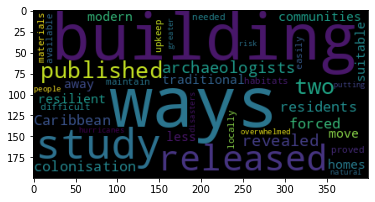

In [26]:
some_text = '''A study released in 2020, published by two 
archaeologists, revealed how colonisation forced 
residents in Caribbean communities to move away 
from traditional and resilient ways of building 
homes to more modern but less suitable ways. These 
habitats have proved to be more difficult to 
maintain, with the materials needed for upkeep not 
locally available, and the buildings easily 
overwhelmed by hurricanes, putting people at 
greater risk during natural disasters.'''

from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_text(some_text))

***
## 2. Classification of Movie Reviews

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer


In [28]:
# Read the data, create the X and y variables, and look at the dataframe
df = pd.read_csv("shared/IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [29]:
# let us look at two random reviews
x = np.random.randint(0, len(df))
print(df['sentiment'][x:x+2])
list(df['review'][x:x+2])

48137    positive
48138    negative
Name: sentiment, dtype: object


["I think it's about 3 years ago when I saw this movie. Accidentally I revisited the info-site for it here and immediately I felt good again! I remembered seeing this movie and loving life again! It showed me I could find love and what-do-you-know?? I have a boyfriend for a year and a half now and love is definitely there..",
 '"Wagons East" was a big disappointment for me. But the saddest thing about this movie is that it turned out to be John Candy\'s last film role (he died just before shooting was completed on this). There are only a few laughs throughout this western spoof, and for a comedy that doesn\'t cut it. If you want to see a uproarious spoof of western movies, the answer is obvious. See Mel Brooks\' classic "Blazing Saddles". Or if you want to see Candy in much better material, see "Summer Rental", "Spaceballs", or "Uncle Buck" (just to name a few). These three movies (as well as others) shows us what a great comic actor he was. Unfortuneately, "Wagons East" does not. What

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [31]:
# We tokenize the text based on the training data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='[UNK]', num_words=2000)

tokenizer.fit_on_texts(X_train)   

In [32]:
# let us look around the tokenized data


# Word frequency from the dictionary (tokenizer.word_counts())
print('Top words\n', pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False).head(20).reset_index(drop=True))


# How many documents in the corpus
print('\nHow many documents in the corpus?', tokenizer.document_count)

      
print('Total unique words', len(tokenizer.word_index))

Top words
         0       1
0     the  533202
1     and  259706
2       a  258498
3      of  231892
4      to  214391
5      is  168598
6      br  161819
7      in  149947
8      it  125110
9       i  123647
10   this  120771
11   that  109758
12    was   76583
13     as   73595
14    for   69955
15   with   69951
16  movie   69880
17    but   66766
18   film   61986
19     on   54256

How many documents in the corpus? 40000
Total unique words 112348


In [33]:
# We can also look at the word_index
print(tokenizer.word_index)

{'[UNK]': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'be': 27, 'he': 28, 'one': 29, 'at': 30, 'all': 31, 'by': 32, 'an': 33, 'they': 34, 'so': 35, 'who': 36, 'from': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'about': 42, 'out': 43, 'if': 44, "it's": 45, 'has': 46, 'there': 47, 'some': 48, 'what': 49, 'good': 50, 'when': 51, 'more': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'my': 57, 'even': 58, 'would': 59, 'she': 60, 'which': 61, 'only': 62, 'really': 63, 'see': 64, 'story': 65, 'their': 66, 'had': 67, 'can': 68, 'me': 69, 'well': 70, 'were': 71, 'than': 72, 'we': 73, 'much': 74, 'bad': 75, 'been': 76, 'get': 77, 'do': 78, 'other': 79, 'will': 80, 'great': 81, 'also': 82, 'into': 83, 'people': 84, 'because': 85, 'first': 86, 'how': 87, 'him': 88, 'most':

In [34]:
# Next, we convert the tokens to a document term matrix
X_train = tokenizer.texts_to_matrix(X_train, mode='binary')
X_test = tokenizer.texts_to_matrix(X_test, mode='binary')

In [35]:
print('X_train.shape', X_train.shape)
X_train[198:202]

X_train.shape (40000, 2000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [36]:
print('y_train.shape', y_train.shape)
y_train[198:202]

y_train.shape (40000,)


40167    positive
34057    positive
8709     positive
46261    positive
Name: sentiment, dtype: object

In [37]:
# let us encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array


In [38]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [39]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [40]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

[21:47:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Checking accuracy on the training set

In [41]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

In [42]:
# At this point, the predictions are probabilities, eg, 0.37, 0.12 etc.
# We need to convert them to 1s and 0s.  We will do that using a threshold
# of 0.5.

pred = (pred>0.5)*1
pred

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     20134
           1       0.92      0.94      0.93     19866

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



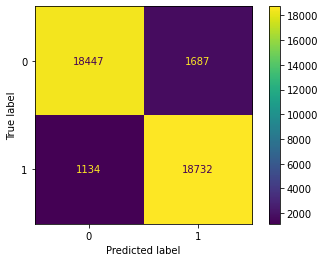

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
cm = confusion_matrix(y_train, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [44]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.914, 0.086],
       [0.966, 0.034],
       [0.479, 0.521],
       ...,
       [0.385, 0.615],
       [0.102, 0.898],
       [0.577, 0.423]], dtype=float32)

### Checking accuracy on the test set

In [45]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

In [46]:
# At this point, the predictions are probabilities, eg, 0.37, 0.12 etc.
# We need to convert them to 1s and 0s.  We will do that using a threshold
# of 0.5.

pred = (pred>0.5)*1
pred

array([0, 0, 1, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4866
           1       0.86      0.87      0.87      5134

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



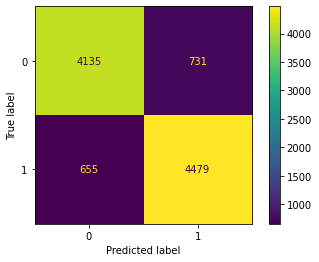

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


### Is our model doing any better than a naive classifier?

In [48]:
from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.50335

In [49]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.499125

In [50]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.501975

***
## 3. Movie Review Classification using a Fully Connected NN

In [51]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout

In [52]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2001000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,004,001
Trainable params: 4,004,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, batch_size=1000, validation_split=0.2, callbacks= [callback])

Epoch 1/15
32/32 [==============================] - 18s 538ms/step - loss: 1.0138 - acc: 0.6851 - val_loss: 0.3928 - val_acc: 0.8539
Epoch 2/15
32/32 [==============================] - 16s 506ms/step - loss: 0.3576 - acc: 0.8505 - val_loss: 0.3168 - val_acc: 0.8648
Epoch 3/15
32/32 [==============================] - 15s 468ms/step - loss: 0.2981 - acc: 0.8777 - val_loss: 0.2976 - val_acc: 0.8715
Epoch 4/15
32/32 [==============================] - 15s 464ms/step - loss: 0.2314 - acc: 0.9106 - val_loss: 0.2971 - val_acc: 0.8767
Epoch 5/15
32/32 [==============================] - 15s 462ms/step - loss: 0.1250 - acc: 0.9548 - val_loss: 0.8343 - val_acc: 0.7939
Epoch 6/15
32/32 [==============================] - 15s 459ms/step - loss: 0.1381 - acc: 0.9610 - val_loss: 0.3469 - val_acc: 0.8721
Epoch 7/15
32/32 [==============================] - 15s 463ms/step - loss: 0.0237 - acc: 0.9933 - val_loss: 3.0045 - val_acc: 0.6212


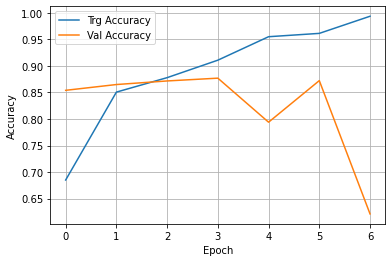

In [54]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [55]:
pred = model.predict(X_test) # Perform predictions
pred =  (pred>.5)*1 # Convert probabilities to 0 and 1 predictions

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      4866
           1       0.99      0.21      0.35      5134

    accuracy                           0.59     10000
   macro avg       0.77      0.61      0.53     10000
weighted avg       0.78      0.59      0.52     10000



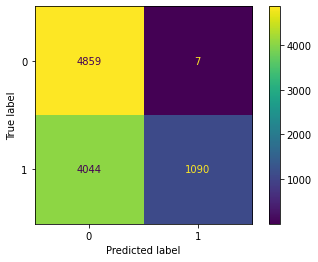

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


***
## 4. Movie Review Classification Using an Embedding Layer
#### Tensorflow Text Vectorization and LSTM network

In [57]:
df = pd.read_csv("shared/IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [58]:
max([len(review) for review in X])

13704

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

##### Next, we convert our text data into arrays that neural nets can consume.  
##### These will be used by the several different architectures we will try next.

In [60]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen=500  # how many words to take from each text
vocab_size=20000 # the size of our vocabulary

# First, we tokenize our training text
tokenizer = Tokenizer(num_words = vocab_size, oov_token='[UNK]')
tokenizer.fit_on_texts(X_train)

# Create sequences and then the X_train vector
sequences_train = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
X_train = pad_sequences(sequences_train, maxlen = maxlen)

# Same thing for the y_train vector
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen = maxlen)

# let us encode the labels as 0s and 1s instead of positive and negative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
print('Classes', dict(list(enumerate(le.classes_))), '\n')

# Now our y variable contains numbers.  Let us one-hot them using Label Binarizer
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train) 
# y_test = lb.fit_transform(y_test) 


print('Shape of X_train tensor', X_train.shape)
print('Shape of y_train tensor', y_train.shape)
print('Shape of X_test tensor', X_test.shape)
print('Shape of y_test tensor', y_test.shape)




Found 112568 unique tokens
Classes {0: 'negative', 1: 'positive'} 

Shape of X_train tensor (40000, 500)
Shape of y_train tensor (40000,)
Shape of X_test tensor (10000, 500)
Shape of y_test tensor (10000,)


In [61]:
print(tokenizer.word_index)

{'[UNK]': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'be': 27, 'one': 28, 'he': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'so': 35, 'who': 36, 'from': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'about': 42, 'out': 43, 'if': 44, "it's": 45, 'has': 46, 'there': 47, 'some': 48, 'what': 49, 'good': 50, 'when': 51, 'more': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'my': 57, 'even': 58, 'would': 59, 'she': 60, 'which': 61, 'only': 62, 'see': 63, 'really': 64, 'story': 65, 'their': 66, 'can': 67, 'had': 68, 'me': 69, 'were': 70, 'well': 71, 'much': 72, 'we': 73, 'than': 74, 'get': 75, 'bad': 76, 'do': 77, 'been': 78, 'will': 79, 'other': 80, 'people': 81, 'also': 82, 'great': 83, 'into': 84, 'because': 85, 'him': 86, 'how': 87, 'first': 88, 'most':

In [62]:
X_train[np.random.randint(0,len(X_train))]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [63]:
pd.DataFrame(X_train).sample(6).reset_index(drop=True)

0    1    2    3    4    5    6    7    8    9    ...   490  491   492  \
0    0    0    0    0    0    0    0    0    0    0  ...  2592   15    71   
1    0    0    0    0    0    0    0    0    0    0  ...  7355  102  2377   
2    0    0    0    0    0    0    0    0    0    0  ...    38   11   300   
3    0    0    0    0    0    0    0    0    0    0  ...    30  696  1379   
4    0    0    0    0    0    0    0    0    0    0  ...     4   83    18   
5    0    0    0    0    0    0    0    0    0    0  ...   382    9    25   

   493   494   495  496  497   498   499  
0   15     2  4015   79   64  1482    23  
1  466     8     8   12    7  1043    76  
2  160  1217   712  166    6    75    10  
3  102    24    62  226   32   455  2226  
4   11  4459    10   55  286   143   154  
5   65     3    91   12  767    58  4500  

[6 rows x 500 columns]

In [64]:
word_index['the']

2

#### Build the model

In [65]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [66]:
embedding_dim = 100

In [67]:
# In this model, we do not use pre-trained embeddings, but let the machine train the embedding weights too
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim)) # Note that vocab_size=20000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,017,057
Trainable params: 2,017,057
Non-trainable params: 0
_________________________________________________________________


In [68]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_split=0.2, callbacks=[callback])



Epoch 1/200
32/32 [==============================] - 129s 4s/step - loss: 0.5884 - acc: 0.7090 - val_loss: 0.4435 - val_acc: 0.8382
Epoch 2/200
32/32 [==============================] - 118s 4s/step - loss: 0.3848 - acc: 0.8547 - val_loss: 0.3402 - val_acc: 0.8668
Epoch 3/200
32/32 [==============================] - 114s 4s/step - loss: 0.2837 - acc: 0.8966 - val_loss: 0.4500 - val_acc: 0.8281
Epoch 4/200
32/32 [==============================] - 116s 4s/step - loss: 0.2520 - acc: 0.9070 - val_loss: 0.2743 - val_acc: 0.8890
Epoch 5/200
32/32 [==============================] - 116s 4s/step - loss: 0.2043 - acc: 0.9270 - val_loss: 0.3077 - val_acc: 0.8859
Epoch 6/200
32/32 [==============================] - 121s 4s/step - loss: 0.1982 - acc: 0.9286 - val_loss: 0.2948 - val_acc: 0.8866
Epoch 7/200
32/32 [==============================] - 116s 4s/step - loss: 0.1708 - acc: 0.9395 - val_loss: 0.3403 - val_acc: 0.8687


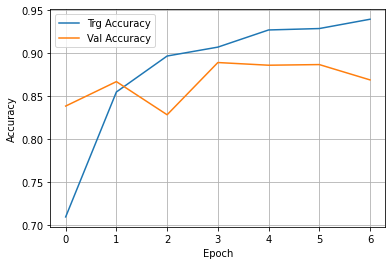

In [69]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [70]:
pred = model.predict(X_test) # Perform predictions
pred =  (pred>.5)*1 # Convert probabilities to 0 and 1 predictions

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5035
           1       0.94      0.79      0.85      4965

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



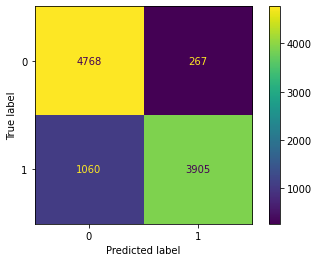

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


##### Now imagine you are trying to extract the embedding layer that was just trained.

In [72]:
extracted_embeddings = model.layers[0].get_weights()[0]

In [73]:
extracted_embeddings.shape

(20000, 100)

##### Let us look at one embedding for the word king

In [74]:
word_index['king']

774

In [75]:
extracted_embeddings[786]

array([-0.01550905, -0.03204303, -0.00848321,  0.04075044,  0.03795993,
        0.05216763,  0.0331544 ,  0.02785999, -0.01143933, -0.03773933,
        0.02729225, -0.01317312,  0.01146402,  0.02782557, -0.01011879,
       -0.0208908 , -0.00019113,  0.01330368,  0.00416766,  0.02410945,
        0.01143199,  0.02289946,  0.05373396, -0.0035287 , -0.04069043,
        0.02522154, -0.01714112,  0.03586277,  0.05531164, -0.03482151,
       -0.05074938,  0.01815143,  0.0255589 ,  0.04363383, -0.02743995,
       -0.03754663, -0.01447271, -0.03650528,  0.04110686, -0.00344937,
        0.03862347, -0.04522548,  0.03113901,  0.02066945,  0.01180359,
        0.04384552,  0.02346409, -0.0335488 ,  0.05072021, -0.01409506,
       -0.01743578, -0.05372558, -0.00223494,  0.03541243,  0.00629982,
        0.02527543, -0.01025313,  0.03717781, -0.03682887,  0.00528236,
        0.01099398,  0.00707593,  0.03578609, -0.04871536, -0.03770036,
       -0.03113532, -0.00705973, -0.04898865,  0.03808383,  0.00

#### Predicting for a new review

In [76]:
new_review = 'The movie is awful garbage hopeless useless no good'
sequenced_review = tokenizer.texts_to_sequences([new_review])
sequenced_review

[[2, 18, 7, 369, 1165, 4767, 3165, 55, 50]]

In [77]:
padded_review = pad_sequences(sequenced_review, maxlen = maxlen)
predicted_class = model.predict(padded_review)
predicted_class

array([[0.05139357]], dtype=float32)

In [78]:
pred = (predicted_class>0.5)*1
int(pred)

0

In [79]:
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [80]:
dict(list(enumerate(le.classes_)))[int(pred)]

'negative'

***
## 5. Movie Review Classification Using Pre-trained Glove Embeddings

##### First, load the Glove embeddings

In [81]:
embeddings_index = {}

f=open(r"shared/glove.6B.100d.txt", encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s words and corresponding vectors' % len(embeddings_index))

Found 400000 words and corresponding vectors


In [82]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [83]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [84]:
len(embeddings_index.get('security'))

100

In [85]:
print(embeddings_index.get('th13e'))

None


In [86]:
y_test

array([1, 1, 1, ..., 0, 0, 1])

In [87]:
# Create the embedding matrix based on Glove
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [88]:
embedding_matrix.shape

(20000, 100)

At this point the `embedding_matrix` has one row per word in the vocabulary.  Each row has the vector for that word, picked from glove.  Because it is an np.array, it has no row or column names. The order of the words in the rows is the same as the order of words in the dict word_index.  
  
We will feed this embedding matrix as weights to the embedding layer.  
  
##### Build the model  

In [89]:
# let us use pretrained Glove embeddings
import keras
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                    trainable=False,mask_zero=True )) # Note that vocab_size=20000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32, name='LSTM_Layer'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2000000   
                                                                 
 LSTM_Layer (LSTM)           (None, 32)                17024     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,017,057
Trainable params: 17,057
Non-trainable params: 2,000,000
_________________________________________________________________


In [90]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_split=0.2, callbacks=[callback])



Epoch 1/200
32/32 [==============================] - 135s 4s/step - loss: 0.6613 - acc: 0.5984 - val_loss: 0.6185 - val_acc: 0.6596
Epoch 2/200
32/32 [==============================] - 125s 4s/step - loss: 0.6119 - acc: 0.6686 - val_loss: 0.5670 - val_acc: 0.7234
Epoch 3/200
32/32 [==============================] - 132s 4s/step - loss: 0.5847 - acc: 0.6939 - val_loss: 0.5346 - val_acc: 0.7448
Epoch 4/200
32/32 [==============================] - 126s 4s/step - loss: 0.5608 - acc: 0.7175 - val_loss: 0.5468 - val_acc: 0.7333
Epoch 5/200
32/32 [==============================] - 127s 4s/step - loss: 0.5444 - acc: 0.7289 - val_loss: 0.5305 - val_acc: 0.7431
Epoch 6/200
32/32 [==============================] - 123s 4s/step - loss: 0.5273 - acc: 0.7418 - val_loss: 0.6683 - val_acc: 0.6576


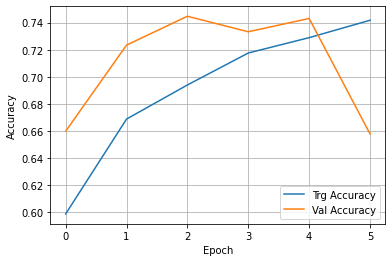

In [91]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [92]:
pred = model.predict(X_test) # Perform predictions
pred =  (pred>.5)*1 # Convert probabilities to 0 and 1 predictions

              precision    recall  f1-score   support

           0       0.91      0.36      0.51      5035
           1       0.60      0.96      0.74      4965

    accuracy                           0.66     10000
   macro avg       0.75      0.66      0.63     10000
weighted avg       0.75      0.66      0.62     10000



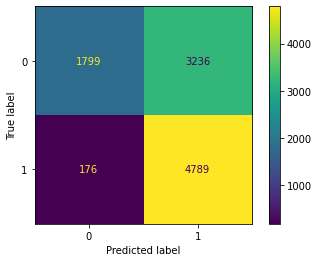

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


***
## 6. Word2Vec - DON'T RUN THIS ON JUPYTERHUB!!!

In [94]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [95]:
 wv.similarity('ship', 'boat')

NameError: name 'wv' is not defined

In [ ]:
 wv.similarity('up', 'down')

In [ ]:
wv.most_similar(positive=['car'], topn=5)

In [ ]:
# king - queen = princess - prince
# king = + queen + princess - prince
wv.most_similar(positive=['queen', 'prince'], negative = ['princess'], topn=5)

In [ ]:
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

In [ ]:
wv['car'].shape

In [ ]:
wv['car']

In [ ]:
# # Create the embedding matrix based on Word2Vec
# # The code below is to be used if Word2Vec based embedding is to be applied
# embedding_dim = 300
# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         try:
#             embedding_vector = wv[word]
#         except:
#             pass
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector
 

***
## 7. BERT - Bidirectional Encoder Representations from Transformers
#### Can't run on Jupyterhub
#### Using pre-trained BERT models

In [ ]:
text = ['I live in Brooklyn.', 'I like to be at the beach and have nothing to do.']

In [ ]:
# import tensorflow_hub as hub
# import tensorflow_text as text

In [ ]:
bert_preprocessor = hub.KerasLayer(r"C:\Users\user\Downloads\bert_en_uncased_preprocess_3")
bert_encoder = hub.KerasLayer(r"C:\Users\user\Downloads\bert_en_uncased_L-12_H-768_A-12")

In [ ]:
preprocessed_inputs = bert_preprocessor(text)
bert_embeddings = bert_encoder(preprocessed_inputs)

In [ ]:
preprocessed_inputs.keys()

In [ ]:
preprocessed_inputs['input_word_ids'][0]

In [ ]:
bert_embeddings.keys()

In [ ]:
bert_embeddings['pooled_output'] == bert_embeddings['default']

In [ ]:
type(bert_embeddings['encoder_outputs'])
type(bert_embeddings['pooled_output'])

In [ ]:
# bert_embeddings['default'] # Embedding for the entire sentence
# bert_embeddings['pooled_output'] # Embedding for the entire sentence
# bert_embeddings['sequence_output'] # Embeddings for each word in each sentence
bert_embeddings['encoder_outputs'] # A list with 12 tensors, each with the embeddings from each of the layers of the BERT encoder


***
## 8. Topic Modeling

In [2]:
# Regular library imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
# https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
text = pd.read_csv('shared/Corona_NLP_train.csv')
print('text.shape', text.shape)


text.shape (41159, 7)


In [4]:
text.dropna(inplace=True)
text.shape

(32565, 7)

In [5]:
# Read stopwords from file
custom_stop_words = []
file = open(file = "shared/stopwords.txt", mode = 'r')
custom_stop_words = file.read().split('\n')


In [6]:
# Input incoming text as a list called raw_documents

raw_documents= list(text['OriginalTweet'])
num_topics = 10
ngram = 2 # 2 for bigrams, 3 for trigrams etc

Once done, the below code will create with two dataframes:  
Main output is:  
   - words_in_topics_df - top_n_words per topic  
   - topic_for_doc_df - topic to which a document is identified  

Additional outputs of interest  
- vocab = This is the dict from which you can pull the words, eg vocab['ocean']  
- terms = Just the list equivalent of vocab, indexed in the same order  
- term_frequency_table = dataframe with the frequency of terms  
- doc_term_matrix = Document term matrix  (doc_term_matrix = W x H)  
- W = This matrix has docs as rows and num_topicss as columns  
- H = This matrix has num_topics as rows and vocab as columns  

    

In [7]:
# use count based vectorizer from sklearn

# vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 2, analyzer='word', ngram_range=(ngram, ngram))

# or use TF-IDF based vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=custom_stop_words, analyzer='word', ngram_range=(ngram, ngram))

# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix in variable doc_term_matrix\n" % (doc_term_matrix.shape[0], doc_term_matrix.shape[1]) )


vocab = vectorizer.vocabulary_ #This is the dict from which you can pull the words, eg vocab['ocean']
terms = vectorizer.get_feature_names() #Just the list equivalent of vocab, indexed in the same order
print("Vocabulary has %d distinct terms, examples below " % len(terms))
print(terms[500:550], '\n')

term_frequency_table = pd.DataFrame({'term': terms,'freq': list(np.array(doc_term_matrix.sum(axis=0)).reshape(-1))})
term_frequency_table = term_frequency_table.sort_values(by='freq', ascending=False).reset_index()

freq_df = pd.DataFrame(doc_term_matrix.todense(), columns = terms)
freq_df = freq_df.sum(axis=0)
freq_df = freq_df.sort_values(ascending=False)

Created 32565 X 46138 document-term matrix in variable doc_term_matrix

Vocabulary has 46138 distinct terms, examples below 
['ability iran', 'ability produce', 'ability react', 'ableg abhealth', 'abnormal prices', 'abroad https', 'absence paid', 'absolute chaos', 'absolute joke', 'absolute necessity', 'absolute panic', 'absolute worst', 'absolutely annihilates', 'absolutely brilliant', 'absolutely bring', 'absolutely coronavirus', 'absolutely disgusted', 'absolutely disgusting', 'absolutely essential', 'absolutely panic', 'absolutely shortage', 'absurd prices', 'abt reduce', 'abundant supply', 'abuse customers', 'abused spat', 'abused supermarket', 'abusing supermarket', 'academic papers', 'accc issues', 'accc provided', 'accc scamwatch', 'accelerate trend', 'accelerated crisis', 'accelerators return', 'accept donations', 'acceptable supermarket', 'accepting consumer', 'access amp', 'access capital', 'access clean', 'access consumer', 'access critical', 'access delivery', 'access esse

In [8]:
# create the model
# Pick between NMF or LDA methods (don't know what they are, try whichever gives better results)

# Use NMF
# model = NMF( init="nndsvd", n_components=num_topics ) 

# Use LDA
model = LatentDirichletAllocation(n_components=num_topics, learning_method='online') 
    
# apply the model and extract the two factor matrices
W = model.fit_transform( doc_term_matrix ) #This matrix has docs as rows and k-topics as columns
H = model.components_ #This matrix has k-topics as rows and vocab as columns
print('Shape of W is', W.shape, 'docs as rows and', num_topics, 'topics as columns. First row below')
print(W[0].round(1))
print('\nShape of H is', H.shape, num_topics, 'topics as rows and vocab as columns. First row below')
print(H[0].round(1))

Shape of W is (32565, 10) docs as rows and 10 topics as columns. First row below
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Shape of H is (10, 46138) 10 topics as rows and vocab as columns. First row below
[0.1 0.1 0.1 ... 0.1 0.1 0.1]


In [9]:
# Check which document belongs to which topic, and print value_count
topic_for_doc_df = pd.DataFrame(columns = ['article', 'topic', 'value'])
for i in range(W.shape[0]):
    a = W[i] 
    b = np.argsort(a)[::-1]
    temp_df = pd.DataFrame({'article': [i], 'topic':['Topic_'+str(b[0])], 'value': [a[b[0]]]})
    topic_for_doc_df = pd.concat([topic_for_doc_df, temp_df])

top_docs_for_topic_df = pd.DataFrame(columns = ['topic', 'doc_number', 'weight'])    
for i in range(W.shape[1]):
    topic = i
    temp_df = pd.DataFrame({'topic': ['Topic_'+str(i) for x in range(W.shape[0])], 
                            'doc_number':  list(range(W.shape[0])), 
                            'weight': list(W[:,i])})
    temp_df = temp_df.sort_values(by=['topic', 'weight'], ascending=[True, False])
    top_docs_for_topic_df = pd.concat([top_docs_for_topic_df, temp_df])
# Add text to the top_docs dataframe as a new column
top_docs_for_topic_df['text']=[raw_documents[i] for i in list(top_docs_for_topic_df.doc_number)] 

In [10]:
# Print top two docs for each topic
print('\nTop documents for each topic')
(top_docs_for_topic_df.groupby('topic').head(2))


Top documents for each topic


topic doc_number    weight  \
27750  Topic_0      27750  0.830547   
27464  Topic_0      27464  0.822650   
1656   Topic_1       1656  0.841488   
3248   Topic_1       3248  0.841488   
27036  Topic_2      27036  0.819005   
16926  Topic_2      16926  0.818745   
30305  Topic_3      30305  0.819991   
5698   Topic_3       5698  0.816501   
27419  Topic_4      27419  0.844079   
27248  Topic_4      27248  0.841401   
32194  Topic_5      32194  0.830852   
32193  Topic_5      32193  0.830009   
13373  Topic_6      13373  0.831967   
21674  Topic_6      21674  0.808454   
5440   Topic_7       5440  0.826843   
5598   Topic_7       5598  0.823409   
18754  Topic_8      18754  0.815259   
2399   Topic_8       2399  0.812898   
5538   Topic_9       5538  0.838523   
791    Topic_9        791  0.835433   

                                                    text  
27750  Benchmark Data: How COVID-19 Is Impacting Sale...  
27464  https://t.co/TOcz3e8as4 Benchmark Data: How CO...  
1656   CONSUMER ALERT: Scammers are sending phony COV...  
3248   CONSUMER ALERT: Scammers are sending phony COV...  
27036  Food redistribution organisations across #Engl...  
16926  Cycleways and pedestrian routes make transport...  
30305  @BruceDawson0xB @GovernorVA @USTreasury @White...  
5698   Guardians joined 575+ utility justice, labor, ...  
27419  REDUCED PRICES DUE TO #coronavirus #onlineclas...  
27248  ALERT!!\r\r\nREDUCED PRICES DUE TO #coronaviru...  
32194  ?Single Auto Sanitizer Gate?\r\r\n?Follow @Sol...  
32193  ?Double Auto Sanitizer Gate?\r\r\n?Follow @Sol...  
13373  Honorable PM sir with current scenario regardi...  
21674  With the #Coronavirus #COVID19 changing the wa...  
5440   #COVID?19 protection?face masks online in??\r\...  
5598   #Covid_19 protection?face masks online in??\r\...  
18754  Take a look on the #trading potential of #EUET...  
2399   Humanity at its best more please   This woman ...  
5538   PamyBot:~$#forex #fxDailyFX "#Gold prices have...  
791    @KariLeeAK907 Wells Fargo is committed to help...

In [11]:
print('Topic number and counts of documents against each:')
(topic_for_doc_df.topic.value_counts())

Topic number and counts of documents against each:


Topic_2    3600
Topic_8    3453
Topic_9    3435
Topic_6    3395
Topic_0    3342
Topic_3    3321
Topic_5    3043
Topic_1    3025
Topic_7    2981
Topic_4    2970
Name: topic, dtype: int64

In [12]:
# Create dataframe with top-10 words for each topic
top_n_words = 10

words_in_topics_df = pd.DataFrame(columns = ['topic', 'words', 'freq'])
for i in range(H.shape[0]):
    a = H[i] 
    b = np.argsort(a)[::-1]
    np.array(b[:top_n_words])
    words = [terms[i] for i in b[:top_n_words]]
    freq = [a[i] for i in b[:top_n_words]]
    temp_df = pd.DataFrame({'topic':'Topic_'+str(i), 'words': words, 'freq': freq})
    words_in_topics_df = pd.concat([words_in_topics_df, temp_df])

print('\n')
print('Top', top_n_words, 'words dataframe with weights')
(words_in_topics_df.head(10))



Top 10 words dataframe with weights


topic                words       freq
0  Topic_0        grocery store  92.645467
1  Topic_0          covid https  68.694648
2  Topic_0    consumer behavior  51.945092
3  Topic_0    consumer spending  50.137477
4  Topic_0         impact covid  46.392452
5  Topic_0   consumer sentiment  35.029516
6  Topic_0       covid lockdown  34.358122
7  Topic_0  covid19 coronavirus  33.289747
8  Topic_0    coronavirus https  29.824896
9  Topic_0            wear mask  24.970304

In [13]:
# print as list
print('\nSame list as above as a list')
words_in_topics_list = words_in_topics_df.groupby('topic')['words'].apply(list)
lala =[]
for i in range(len(words_in_topics_list)):
    a = [list(words_in_topics_list.index)[i]]
    b = words_in_topics_list[i]
    lala = lala + [a+b]
    print(a + b) 
    
    


Same list as above as a list
['Topic_0', 'grocery store', 'covid https', 'consumer behavior', 'consumer spending', 'impact covid', 'consumer sentiment', 'covid lockdown', 'covid19 coronavirus', 'coronavirus https', 'wear mask']
['Topic_1', 'gas prices', 'toilet paper', 'grocery shopping', 'toiletpaper coronavirus', 'covid consumer', 'online grocery', 'coronavirus https', 'grocery store', 'consumer confidence', 'post covid']
['Topic_2', 'oil prices', 'social distancing', 'covid outbreak', 'coronavirus covid', 'hand sanitizer', 'spread covid', 'outbreak https', 'coronavirus outbreak', 'face masks', 'grocery store']
['Topic_3', 'coronavirus crisis', 'food banks', 'food bank', 'crisis https', 'covid crisis', 'demand food', 'grocery store', 'covid2019 https', 'stock food', 'grocery stores']
['Topic_4', 'supermarket workers', 'supermarket shelves', 'price gouging', 'consumer protection', 'prices coronavirus', 'socialdistancing https', 'store https', 'covid impact', 'real estate', 'covid pan

In [14]:
# Top terms
print('\nTop 10 most numerous terms:')
term_frequency_table.head(10)


Top 10 most numerous terms:


index                 term        freq
0  18590        grocery store  614.788753
1   8342    coronavirus https  358.257112
2  18887       hand sanitizer  275.634814
3   8118  coronavirus covid19  242.499164
4  27135      online shopping  239.047282
5  42444         toilet paper  223.675903
6  10292  covid19 coronavirus  221.531573
7  28172         panic buying  185.114022
8  26895           oil prices  166.377861
9   9913       covid pandemic  161.526717

***
## 9. GPT-2 - Generative Pre-trained Transformer 2 by OpenAI
### Can't run on Jupyterhub

In [ ]:
text = '''The highest inflation in three decades is posing a new test for President Biden as he seeks to push through another pillar of his economic agenda while also easing Americans’ concerns about rising consumer prices'''

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
generated_text = generator(text, max_length=1200, num_return_sequences=1)
print(generated_text[0]['generated_text'])

In [ ]:
# Also see https://app.inferkit.com/demo

In [ ]:
len(generated_text)

In [ ]:
# https://www.kaggle.com/shivanandmn/multilabel-classification-dataset